In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# UniRef90

In [2]:
filepath = os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref_data/uniref90_final.csv")

In [12]:
df = pd.read_csv(filepath)

In [13]:
print("df size = ", df.shape)
n = df.shape[0]
df.head()

df size =  (19093, 8)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...


In [14]:
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [15]:
df.head()

,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...,156
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...,388
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...,96
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...,176
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...,162


In [16]:
df["virus_name"].unique()

array(['Hepatitis B virus', 'Paslahepevirus balayani',
       'Dobrava-Belgrade orthohantavirus', 'West Nile virus',
       'Small ruminant morbillivirus', 'African swine fever virus',
       'Lymphocytic choriomeningitis mammarenavirus', 'Orf virus',
       'Macacine alphaherpesvirus 1', 'Infectious bursal disease virus',
       'Usutu virus', 'Carnivore protoparvovirus 1',
       'Lassa mammarenavirus', 'Vesicular exanthema of swine virus',
       'Tula orthohantavirus', 'Chikungunya virus', 'Vaccinia virus',
       'Kyasanur Forest disease virus', 'Bovine gammaherpesvirus 4',
       'Monkeypox virus', 'Sindbis virus', 'African horse sickness virus',
       'Cowpox virus', 'Getah virus', 'Zika virus',
       'Papiine alphaherpesvirus 2',
       'Epizootic hemorrhagic disease virus', 'Guanarito mammarenavirus',
       'Severe acute respiratory syndrome-related coronavirus',
       'Sheeppox virus', 'Lyssavirus mokola', 'Borna disease virus',
       'Nipah henipavirus', 'Ilheus virus',

In [20]:
coronaviridae_df = df[df["virus_name"].str.contains("corona")]
coronaviridae_df.shape

(63, 9)

In [24]:
coronaviridae_df["virus_name"].value_counts()

Severe acute respiratory syndrome-related coronavirus    21
Avian coronavirus                                        18
Murine coronavirus                                       12
Middle East respiratory syndrome-related coronavirus      6
Thrush coronavirus HKU12-600                              4
Betacoronavirus 1                                         2
Name: virus_name, dtype: int64

In [23]:
coronaviridae_df["virus_host_name"].value_counts()

Homo sapiens            20
Gallus gallus           14
Mus musculus            10
Camelus dromedarius      6
Meleagris gallopavo      4
Turdus hortulorum        4
Rattus norvegicus        2
Rhinolophus sinicus      1
Bos taurus               1
Rhinolophus macrotis     1
Name: virus_host_name, dtype: int64

min seq len = 11
max seq len = 6629


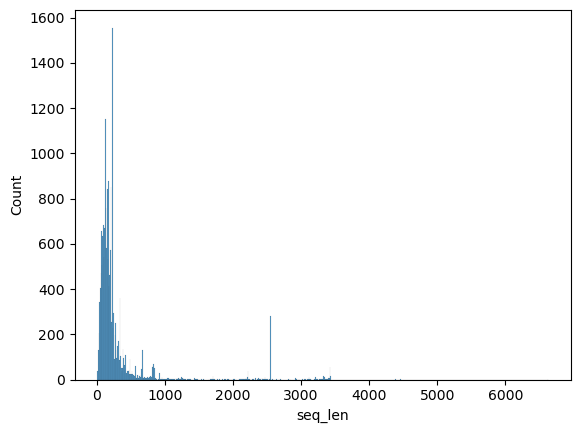

In [7]:
sns.histplot(df["seq_len"])
print(f"min seq len = {min(df['seq_len'])}")
print(f"max seq len = {max(df['seq_len'])}")
plt.show()

In [8]:
n_bins = 12
freq, bins = np.histogram(df["seq_len"], bins=n_bins)

In [9]:
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})

In [10]:
hist_df = pd.DataFrame(hist_map)

In [11]:
hist_df.head(20)

,start,end,count,percentage
0,11.0,562.5,17443,91.358089
1,562.5,1114.0,849,4.446656
2,1114.0,1665.5,111,0.581365
3,1665.5,2217.0,91,0.476614
4,2217.0,2768.5,399,2.089771
5,2768.5,3320.0,68,0.356151
6,3320.0,3871.5,128,0.670403
7,3871.5,4423.0,2,0.010475
8,4423.0,4974.5,1,0.005238
9,4974.5,5526.0,0,0.000000


### Sequences without virus host = Humans

In [15]:
print(df.shape)
df["virus_host_name"].value_counts()

(19093, 9)


Homo sapiens                   14816
Phacochoerus aethiopicus        1043
Bandicota bengalensis            798
Equus caballus                   439
Capra hircus                     425
Gallus gallus                    334
Apodemus sylvaticus              287
Bos taurus                       193
Sus scrofa                       122
Cynomys gunnisoni                 86
Connochaetes taurinus             58
Camelus dromedarius               35
Apodemus agrarius                 33
Elephas maximus                   29
Cynopterus brachyotis             28
Acrocephalus scirpaceus           27
Antilocapra americana             25
Epomops franqueti                 25
Ovis aries                        24
Felis catus                       22
Cervus elaphus                    18
Abrothrix longipilis              17
Macaca fascicularis               17
Cavia cutleri                     14
Meleagris gallopavo               13
Chodsigoa caovansunga             13
Mus musculus                      10
A

In [12]:
df["virus_host_name"].unique()

array(['Homo sapiens', 'Bandicota bengalensis', 'Apodemus agrarius',
       'Equus caballus', 'Capra hircus', 'Phacochoerus aethiopicus',
       'Gallus gallus', 'Felis catus', 'Odobenus rosmarus', 'Sus scrofa',
       'Bos taurus', 'Cynomys gunnisoni', 'Acrocephalus scirpaceus',
       'Camelus dromedarius', 'Apodemus sylvaticus',
       'Antilocapra americana', 'Ovis aries', 'Meleagris gallopavo',
       'Chodsigoa caovansunga', 'Cynopterus brachyotis',
       'Aotus trivirgatus', 'Nasua nasua', 'Rhinolophus sinicus',
       'Abrothrix longipilis', 'Chlorocebus pygerythrus',
       'Macaca fascicularis', 'Calomys callosus', 'Oecomys bicolor',
       'Nephelomys albigularis', 'Cavia cutleri', 'Turdus hortulorum',
       'Haemorhous mexicanus', 'Akodon azarae', 'Sturnira lilium',
       'Atelerix albiventris', 'Epomops franqueti',
       'Connochaetes taurinus', 'Callospermophilus lateralis',
       'Mus musculus', 'Ailuropoda melanoleuca', 'Rattus norvegicus',
       'Cercopithecus ha

In [13]:
df = df[df["virus_host_name"] != "Homo sapiens"]

In [14]:
print(df.shape)
df["virus_host_name"].unique()

(4277, 8)


array(['Bandicota bengalensis', 'Apodemus agrarius', 'Equus caballus',
       'Capra hircus', 'Phacochoerus aethiopicus', 'Gallus gallus',
       'Felis catus', 'Odobenus rosmarus', 'Sus scrofa', 'Bos taurus',
       'Cynomys gunnisoni', 'Acrocephalus scirpaceus',
       'Camelus dromedarius', 'Apodemus sylvaticus',
       'Antilocapra americana', 'Ovis aries', 'Meleagris gallopavo',
       'Chodsigoa caovansunga', 'Cynopterus brachyotis',
       'Aotus trivirgatus', 'Nasua nasua', 'Rhinolophus sinicus',
       'Abrothrix longipilis', 'Chlorocebus pygerythrus',
       'Macaca fascicularis', 'Calomys callosus', 'Oecomys bicolor',
       'Nephelomys albigularis', 'Cavia cutleri', 'Turdus hortulorum',
       'Haemorhous mexicanus', 'Akodon azarae', 'Sturnira lilium',
       'Atelerix albiventris', 'Epomops franqueti',
       'Connochaetes taurinus', 'Callospermophilus lateralis',
       'Mus musculus', 'Ailuropoda melanoleuca', 'Rattus norvegicus',
       'Cercopithecus hamlyni', 'Bos ind

In [16]:
df["virus_host_name"].value_counts()

Homo sapiens                   14816
Phacochoerus aethiopicus        1043
Bandicota bengalensis            798
Equus caballus                   439
Capra hircus                     425
Gallus gallus                    334
Apodemus sylvaticus              287
Bos taurus                       193
Sus scrofa                       122
Cynomys gunnisoni                 86
Connochaetes taurinus             58
Camelus dromedarius               35
Apodemus agrarius                 33
Elephas maximus                   29
Cynopterus brachyotis             28
Acrocephalus scirpaceus           27
Antilocapra americana             25
Epomops franqueti                 25
Ovis aries                        24
Felis catus                       22
Cervus elaphus                    18
Abrothrix longipilis              17
Macaca fascicularis               17
Cavia cutleri                     14
Meleagris gallopavo               13
Chodsigoa caovansunga             13
Mus musculus                      10
A

In [29]:
virus_host_names = ["Phacochoerus aethiopicus", "Bandicota bengalensis", "Equus caballus", "Capra hircus", "Gallus gallus", "Apodemus sylvaticus", "Bos taurus"]
df = df[df["virus_host_name"].isin(virus_host_names)]

In [16]:
print(df.shape)
df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref90_final_without_humans.csv"), index=False)

(4277, 8)


### Sequences without single host only

In [17]:
df = df[df["seq_len"] <= 1114]
df = df.drop(columns=["seq_len"])

In [18]:
print(df.shape)
df.head()

(18292, 8)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...


In [20]:
df["virus_name"].value_counts()

Hepatitis B virus                13684
African swine fever virus         1128
Paslahepevirus balayani            766
Orf virus                          329
Cowpox virus                       277
                                 ...  
Schmallenberg orthobunyavirus        1
Foot-and-mouth disease virus         1
Snowshoe hare orthobunyavirus        1
Avastrovirus 2                       1
Louping ill virus                    1
Name: virus_name, Length: 88, dtype: int64

In [16]:
df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref90_final_msl1114.csv"), index=False)